In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = xr.open_dataset("../data/output_average-growth_shading-true.nc").squeeze()
ds = ds.assign_coords(time=ds.time.astype("float")*1e-9/86400)

In [3]:
# ds_ns = xr.open_dataset("data/output_average-growth_shading-false.nc").squeeze()
# ds_ns = ds_ns.assign_coords(time=ds_ns.time.astype("float")*1e-9/86400)

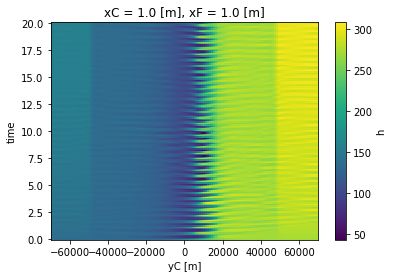

In [4]:
ds.h.plot()

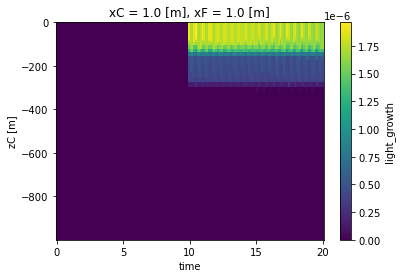

In [5]:
ds.light_growth.mean("yC").T.plot()

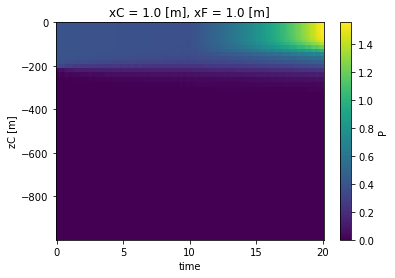

In [6]:
ds.P.mean("yC").T.plot()

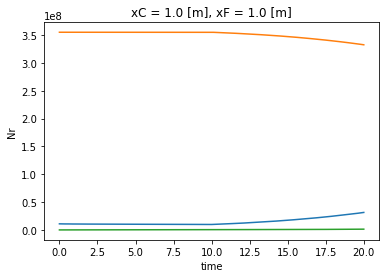

In [8]:
dsi = ds.sel(zC=slice(-200,0)).integrate(["yC","zC"])
dsi.P.plot()
dsi.N.plot()
dsi.Nr.plot()

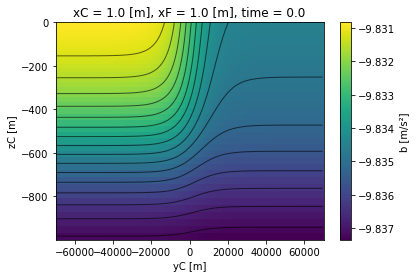

In [9]:
ds.b.isel(time=0).plot()
ds.b.isel(time=0).plot.contour(levels=20,colors='k',linestyles='solid',linewidths=1,alpha=0.6)

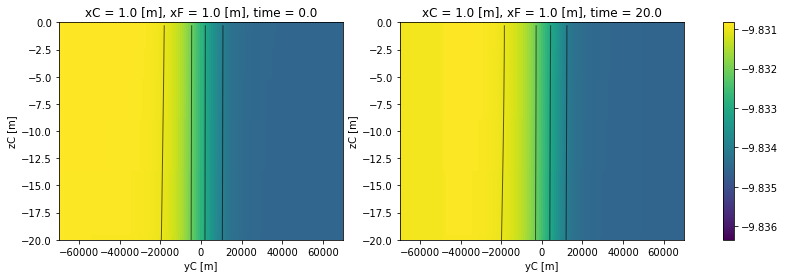

In [4]:
levels = np.arange(-9.84,-9.3,0.001)

kw = dict(vmin=ds.b.isel(time=0).min().values+0.001,vmax=ds.b.isel(time=0).max().values,extend='both')

fig,ax = plt.subplots(1,2,figsize=(14,4))
ti = 0
ds.b.isel(time=ti).isel(zC=slice(-10,None)).plot(ax=ax[0],add_colorbar=False,**kw)
ds.b.isel(time=ti).isel(zC=slice(-10,None)).plot.contour(ax=ax[0],colors='k',linestyles='solid',linewidths=1,alpha=0.6,levels=levels)

ti = -1
C = ds.b.isel(time=ti).isel(zC=slice(-10,None)).plot(ax=ax[1],add_colorbar=False,**kw)
ds.b.isel(time=ti).isel(zC=slice(-10,None)).plot.contour(ax=ax[1],colors='k',linestyles='solid',linewidths=1,alpha=0.6,levels=levels)

fig.colorbar(C,ax=ax)
_ = [a.set(ylim=[-20,0]) for a in ax]

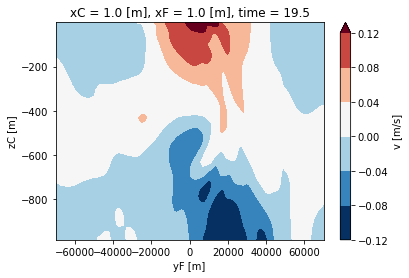

In [6]:
# ds.b.isel(time=0).plot.contour()
ds.v.isel(time=-5).plot.contourf(robust=True)

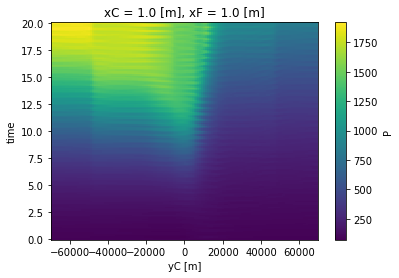

In [13]:
ds.P.integrate("zC").plot()

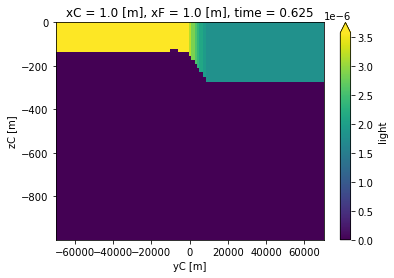

In [14]:
ds.light.isel(time=5).plot(robust=True)

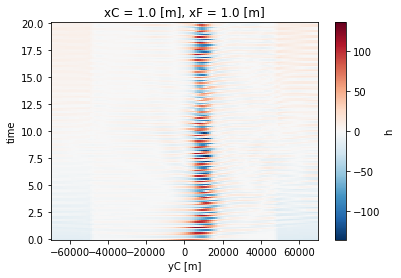

In [15]:
(ds.h-ds.h.mean("time")).plot()

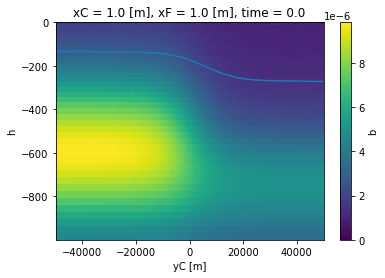

In [8]:
(ds.b.differentiate("zC")).plot()
(-ds.h).plot()

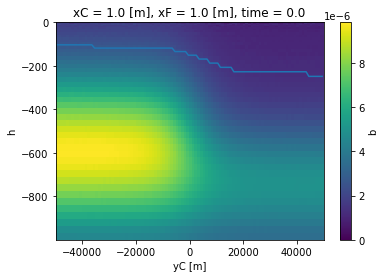

In [14]:
(ds.b.differentiate("zC")).plot()
(-ds.h).plot()

In [3]:
total = (ds.P+ds.N+ds.Nr).integrate(["xC","yC","zC"])

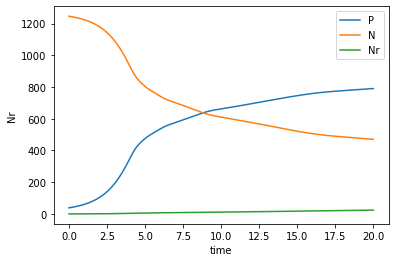

In [14]:
zmin = -100
fig,ax = plt.subplots()
ds.P.mean(["xC","yC"]).sel(zC=slice(-100,0)).integrate("zC").plot(label="P")
ds.N.mean(["xC","yC"]).sel(zC=slice(-100,0)).integrate("zC").plot(label="N")
ds.Nr.mean(["xC","yC"]).sel(zC=slice(-100,0)).integrate("zC").plot(label="Nr")
ax.legend()

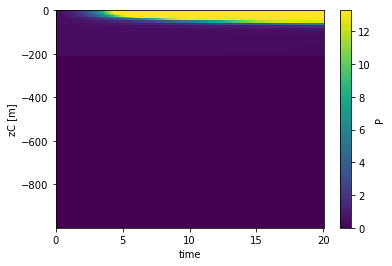

In [7]:
ds.P.mean(["xC","yC"]).T.plot()

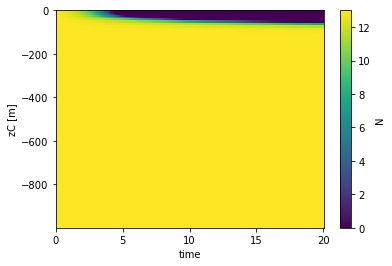

In [8]:
ds.N.mean(["xC","yC"]).T.plot()

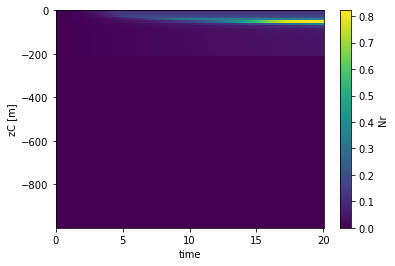

In [9]:
ds.Nr.mean(["xC","yC"]).T.plot()

[(-0.01, 0.01)]

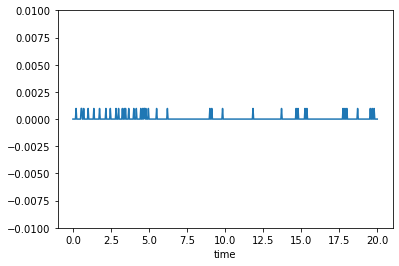

In [13]:
fig,ax = plt.subplots()
(total-total.isel(time=0)).plot()
ax.set(
    ylim=[-1e-2,1e-2],
)